# Declare Random Forest (add hyperparams, etc. as needed):

In [1]:
import _pickle as cPickle
def RFR_export_model(rfr,file_path):
    with open(file_path, 'wb') as f:
        cPickle.dump(rfr, f)

In [2]:
# Importing our Utilities functions:
from utils import CautDataloaderRegular
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
    
def RFR_Model(data_mode,
              csv_path,
              data_dir,
              approach_type,
              batch_size=32,
              threshold=0.5,
              train_verbose=True):

    X_y_data = CautDataloaderRegular.get_X_y_TrainTest_Visual(csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
                                                       data_dir=data_dir,
                                                       data_mode=data_mode,
                                                       approach_type=approach_type,  # sequential",
                                                       verbose=True)
    
    if data_mode == "OpenFace" and approach_type == "average":
        X_train, y_train = X_y_data[0], X_y_data[1]
        X_test, y_test = X_y_data[2], X_y_data[3]
    else:
        X_train, y_train = X_y_data[0].reshape(-1, X_y_data[0].shape[1] * X_y_data[0].shape[2]), X_y_data[1]
        X_test, y_test = X_y_data[2].reshape(-1, X_y_data[2].shape[1] * X_y_data[2].shape[2]), X_y_data[3]
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0
    
    # Setup model:
    #fitting and evaluating
    rf = RandomForestClassifier(n_estimators=120)
    
    # fit the model:
    rf.fit(X_train, y_train)
    
    # predict on test data:
    y_pred = rf.predict(X_test)
    
    # get metrics (accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    
    # show confusion matrix
    CautDataloaderRegular.plot_confusion_matrix(y_test, y_pred)
    return rf

# OpenFace Average:


Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 0
Video failed to be processed by OpenFace. Videoname=trial_truth_025_007.
Processed 300 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 0
Video failed to be processed by OpenFace. Videoname=trial_lie_053_007.
Processed 400 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Processed 500 / 520
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 0
Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Processed 100 / 223
  - Sample shape & label:
    - X_data: (27,)
    - y_data: 1
Video failed to be processed by OpenFace. Videoname=trial_lie_053_002.
Video failed to be processed by OpenFace. Videoname=trial_truth_025_008.
Video failed t

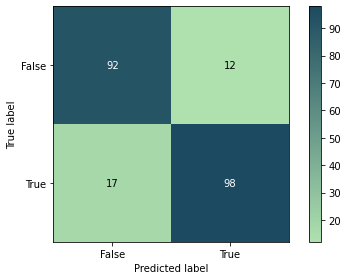

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 98
     - False Positive           : 12
     - True Negative            : 92
     - False Negative           : 17
     - True Positive Rate       :  0.8521739130434782
     - True Negative Rate       :  0.8846153846153846
     - Positive Predictive Value:  0.8909090909090909
     - Negative predictive value:  0.8440366972477065
     - False Positive Rate      :  0.11538461538461539
     - False Negative Rate      :  0.14782608695652175
     - False Discovery Rate     :  0.10909090909090909


In [3]:
rfr = RFR_Model(data_mode="OpenFace",
          csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
          data_dir="C:\\Work\\606Capstone\\Video_chunks\\Excel\\",
          approach_type="average",
          threshold=0.5,
          train_verbose=False)
RFR_export_model(rfr,"C:\\Work\\606Capstone\\Video_chunks\\Models\\OpenFaceAverage_RFR.pickle")

# OpenFace Sequential:


Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 0
Processed 300 / 520
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 1
Processed 400 / 520
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 0
Processed 500 / 520
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 1
Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Processed 100 / 223
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 1
Processed 200 / 223
  - Sample shape & label:
    - X_data: (90, 27)
    - y_data: 0
Casting collected data to .npy array type...
Data is collected. Returning X and y data.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


Accuracy: 0.7837837837837838
Precision 0.8108108108

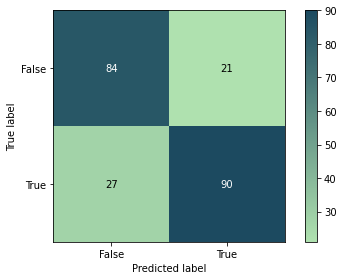

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 90
     - False Positive           : 21
     - True Negative            : 84
     - False Negative           : 27
     - True Positive Rate       :  0.7692307692307693
     - True Negative Rate       :  0.8
     - Positive Predictive Value:  0.8108108108108109
     - Negative predictive value:  0.7567567567567568
     - False Positive Rate      :  0.2
     - False Negative Rate      :  0.23076923076923078
     - False Discovery Rate     :  0.1891891891891892


In [4]:
rfr = RFR_Model(data_mode="OpenFace",
          csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
          data_dir="C:\\Work\\606Capstone\\Video_chunks\\Excel\\",
          approach_type="sequential",
          threshold=0.5,
          train_verbose=False)
RFR_export_model(rfr,"C:\\Work\\606Capstone\\Video_chunks\\Models\\OpenFaceSequential_RFR.pickle")

# MediaPipe Sequential:


Selected csv_path: C:\Work\606Capstone\Video_chunks\CSV\
Processed 100 / 520
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 0
Processed 200 / 520
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 0
Processed 300 / 520
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 1
Processed 400 / 520
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 0
Processed 500 / 520
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 1
Processed 100 / 223
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 1
Processed 200 / 223
  - Sample shape & label:
    - X_data: (90, 36)
    - y_data: 1
----------------------------
Gathered data shapes:
X_train.shape: (520, 90, 36)
y_train.shape: (520,)
X_test.shape: (223, 90, 36)
y_test.shape: (223,)
Accuracy: 0.9192825112107623
Precision 0.9032258064516129
Recall 0.9491525423728814


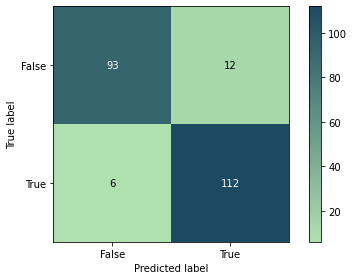

---------------------------------------------------------------

Metrics Rates:
     - True Positive            : 112
     - False Positive           : 12
     - True Negative            : 93
     - False Negative           : 6
     - True Positive Rate       :  0.9491525423728814
     - True Negative Rate       :  0.8857142857142857
     - Positive Predictive Value:  0.9032258064516129
     - Negative predictive value:  0.9393939393939394
     - False Positive Rate      :  0.11428571428571428
     - False Negative Rate      :  0.05084745762711865
     - False Discovery Rate     :  0.0967741935483871


In [5]:
rfr = RFR_Model(data_mode="MediaPipe",
          csv_path="C:\\Work\\606Capstone\\Video_chunks\\CSV\\",
          data_dir="C:\\Work\\606Capstone\\Video_chunks\\MediaPipe\\",
          approach_type=None,
          threshold=0.5,
          train_verbose=False)
RFR_export_model(rfr,"C:\\Work\\606Capstone\\Video_chunks\\Models\\MediaPipeSequential_RFR.pickle")